### Downloading street networks 
After successfully installing OSMnx, we can start coding. The first thing we need to do is to download the data. Downloading the data can be achieved in different ways, one of the easiest ways is to use graph_from_place().

In [1]:
import osmnx as ox

In [2]:
#place = ["Kathmandu, Nepal"]
#G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all')

In [3]:
center_point = (27.7172, 85.3240)
G1 = ox.graph_from_point(center_point, dist=10000, retain_all=True, simplify = True, network_type='all')

In [4]:
import networkx as nx

In [11]:
W1 = ox.graph_from_point(center_point, dist=10000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["natural"~"water"]')

W2 = ox.graph_from_point(center_point, dist=10000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["waterway"~"river"]')

#Gwater = nx.compose(W1, W2)

In [12]:
Gwater = nx.compose(W1, W2)

In [64]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
# #262375
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#5dc1b9"
            linewidth = 5
        else:
            color = "#5dc1b9"
            linewidth = 0.5
    else:
        color = "#5dc1b9"
        linewidth = 0.5
        
    roadColors.append(color)    
    roadWidths.append(linewidth)

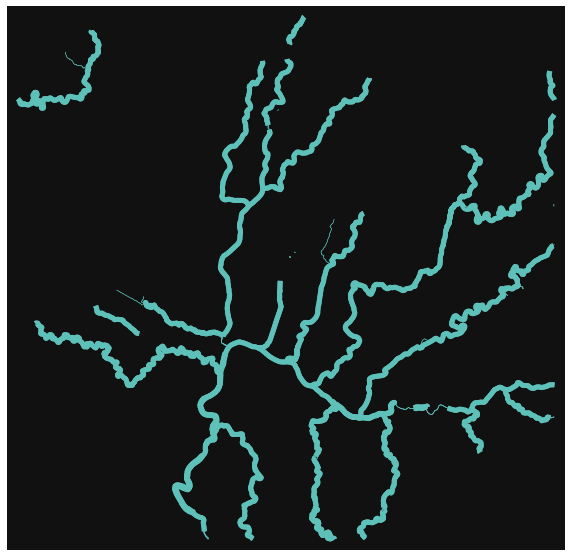

In [66]:
fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(10, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)
#fig.savefig("water.png", dpi=300, format="png", bbox_inches='tight',
            #facecolor=fig.get_facecolor(), transparent=True)

In [79]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G1.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)   

In [83]:
# Lists to store colors and widths 
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 2
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 1
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.25
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.35
        else:
            color = "#d5d5d5"
            linewidth = 0.45

        if "primary" in item["highway"]:
            linewidth = 0.5
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)


But there is also the possibility of identifying certain roads and only colour them differently.

In [84]:
for item in data:
    if "footway" in item["highway"]:
        color = "#ededed"
        linewidth = 0.25
    else:
        color = "#a6a6a6"
        linewidth = 0.5
        
    roadWidths.append(linewidth)

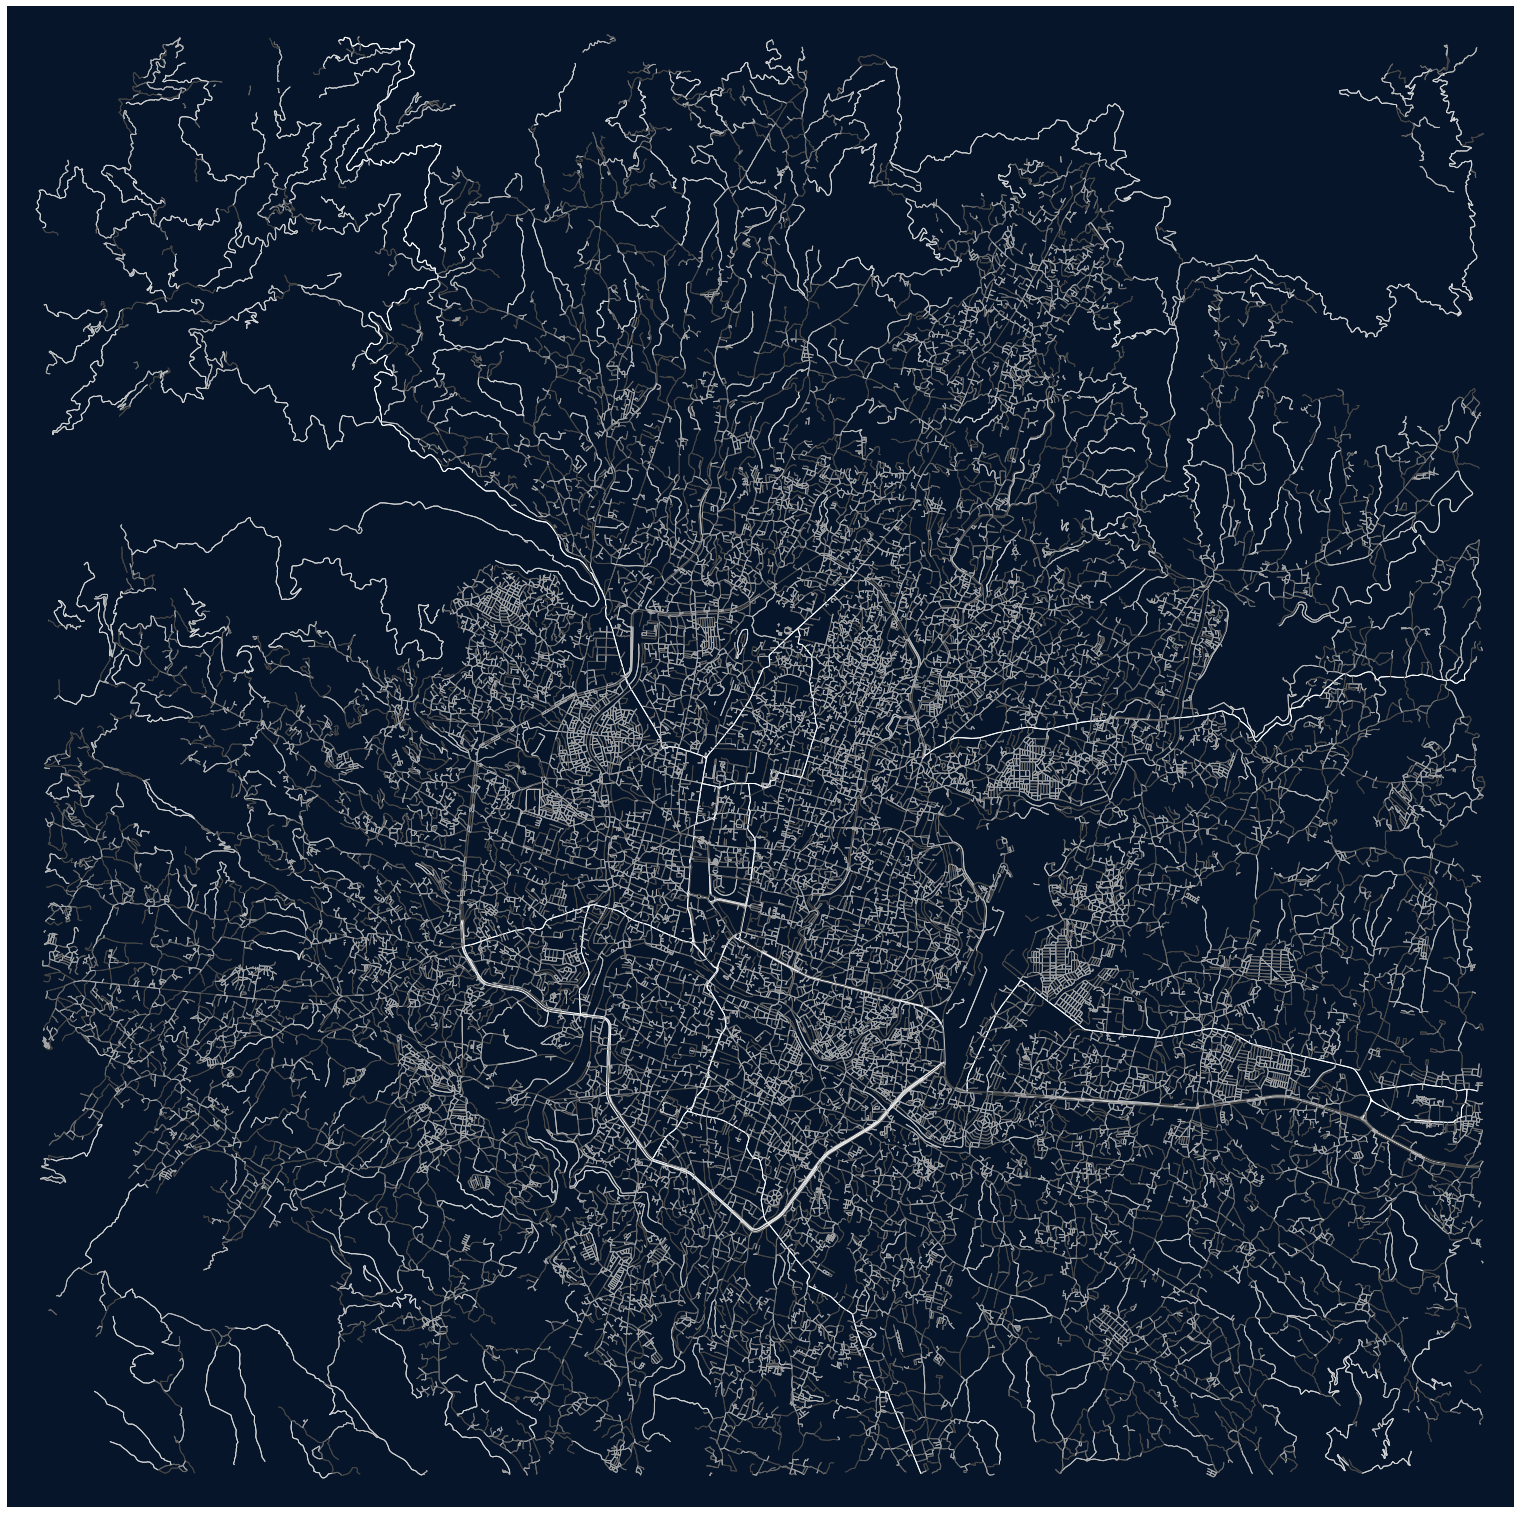

In [85]:
# Center of map
latitude = 27.7172
longitude = 85.3240



bgcolor = "#061529"

fig, ax = ox.plot_graph(G1, node_size=0,figsize=(27, 40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=1, edge_alpha=1)

'''
# Bbox sides
north = latitude + 0.15
south = latitude - 0.15
east = longitude + 0.15
west = longitude - 0.15
fig, ax = ox.plot_graph(G1, node_size=0, bbox = (north, south, east, west),
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)
'''

fig.tight_layout(pad=0)
#fig.savefig("roadMap1.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=False)


In [41]:
Road_Water = nx.compose(G1, Gwater)

In [77]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Road_Water.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#5dc1b9"
            linewidth = 5
        else:
            color = "#8c1638"
            linewidth = 0.5
    else:
        color = "#8c1638"
        linewidth = 0.5
        
    roadColors.append(color)    
    roadWidths.append(linewidth)

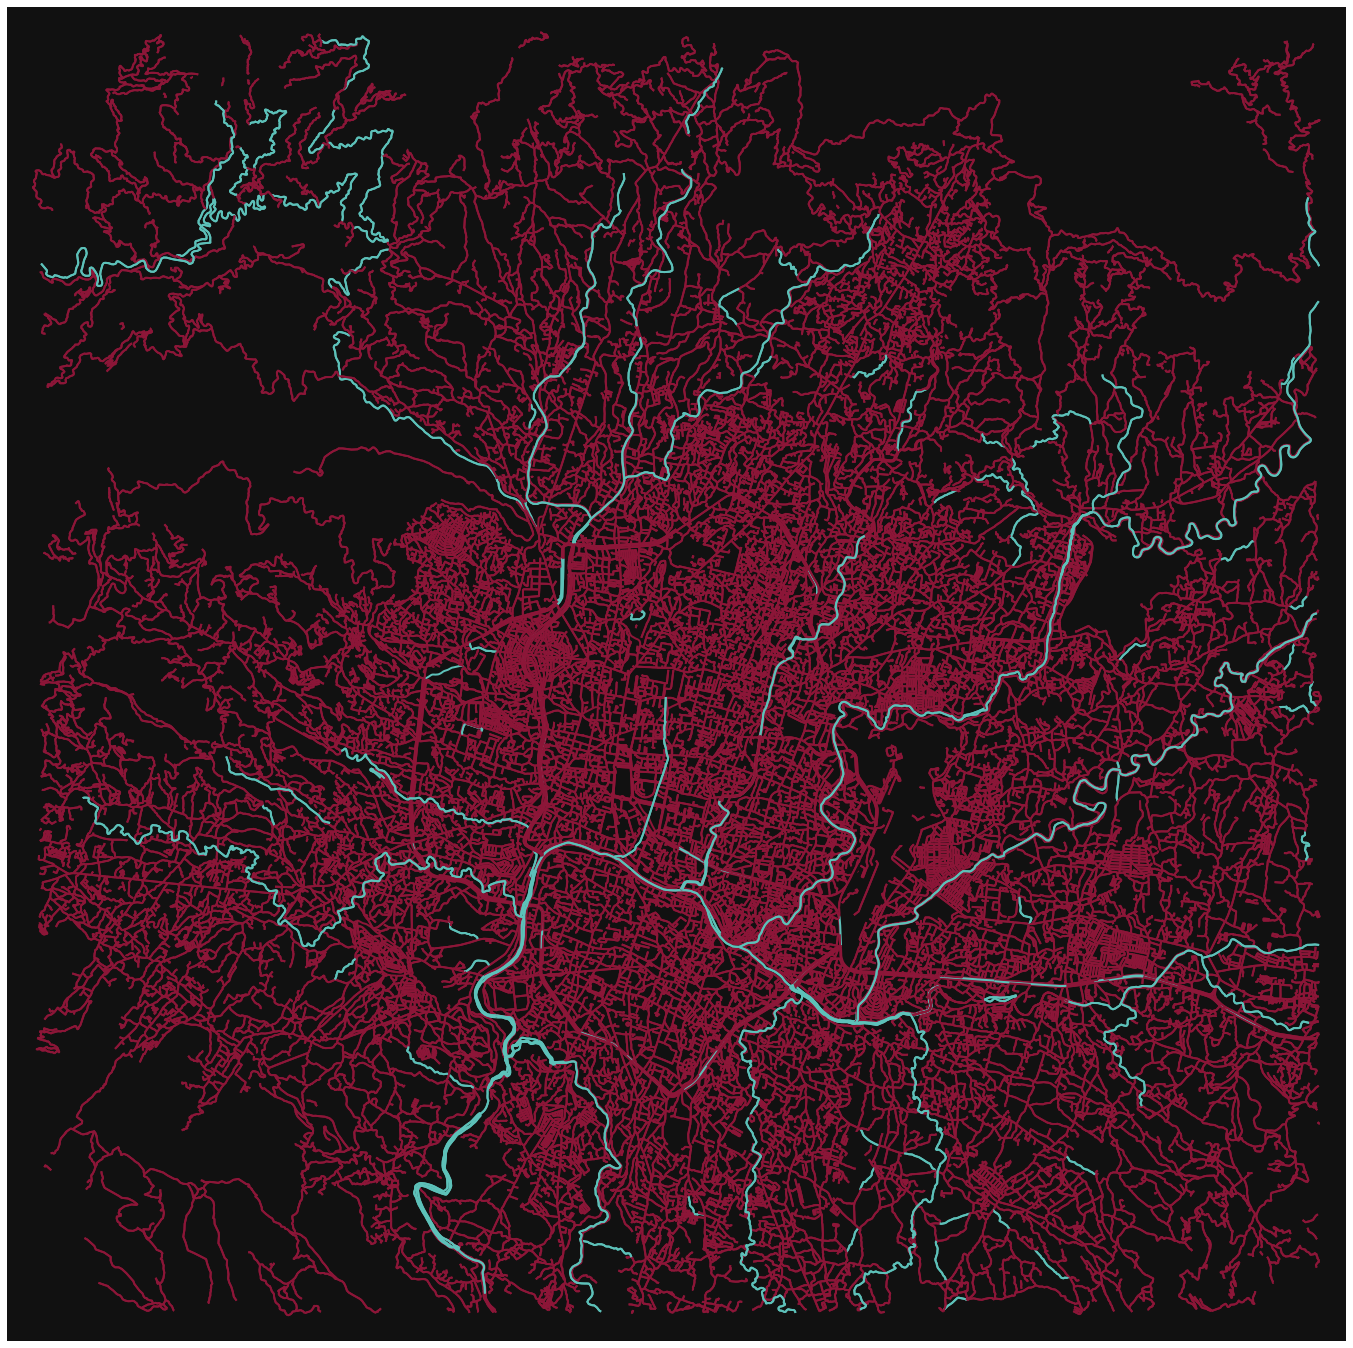

In [78]:
fig, ax = ox.plot_graph(Road_Water, node_size=0,figsize=(24, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=2, edge_alpha=1)

fig.tight_layout(pad=0)
#fig.savefig("road_water_2.png", dpi=300, format="png", bbox_inches='tight',
            #facecolor=fig.get_facecolor(), transparent=True)